In [1]:
!pip install open3d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.5/420.5 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 93.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.1 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.4
    Uninstalling widgetsnbextension-3.6.4:
      Successfully uninstalled widgetsnbextension-3.6.4
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled P

In [8]:
import open3d as o3d
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset_path = "/content/drive/MyDrive/6 DoF Pose Estimation/cereal_box_1/full/cereal_box_1_1_1.pcd"

In [4]:
cloud = o3d.io.read_point_cloud(dataset_path) # Read the point cloud

In [54]:
im1 = "/content/drive/MyDrive/6 DoF Pose Estimation/cereal_box_1/full/juice_container_1_1_1.png"

In [55]:
img1=cv2.imread(im1)

In [59]:
im2="/content/drive/MyDrive/6 DoF Pose Estimation/cereal_box_1/full/cereal_box_1_4_1.png"

In [60]:
img2=cv2.imread(im2)

In [63]:
#o3d.visualization.draw_plotly([cloud])

In [42]:
from google.colab.patches import cv2_imshow

In [61]:
def asift(img1, img2):
    # Define parameters for ASIFT keypoints
    sigma_min = 0.8
    sigma_step = 1.3
    sigma_max = 10.0
    n_scales = 30
    n_octaves = 3

    # Compute ASIFT keypoints and descriptors for image 1
    detector = cv2.AKAZE_create(descriptor_type=cv2.AKAZE_DESCRIPTOR_MLDB_UPRIGHT,
                                threshold=0.0001, nOctaves=n_octaves, nOctaveLayers=n_scales)
    keypoints1, descriptors1 = detector.detectAndCompute(img1, None)

    # Compute ASIFT keypoints and descriptors for image 2
    detector = cv2.AKAZE_create(descriptor_type=cv2.AKAZE_DESCRIPTOR_MLDB_UPRIGHT,
                                threshold=0.0001, nOctaves=n_octaves, nOctaveLayers=n_scales)
    keypoints2, descriptors2 = detector.detectAndCompute(img2, None)

    # Create a brute-force matcher object
    matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING, crossCheck=True)

    # Match the descriptors in the two images
    matches = matcher.match(descriptors1, descriptors2)

    # Sort the matches by distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw the top 10 matches on a new image
    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the image with matches
    cv2_imshow( img_matches)
    cv2.waitKey(0)


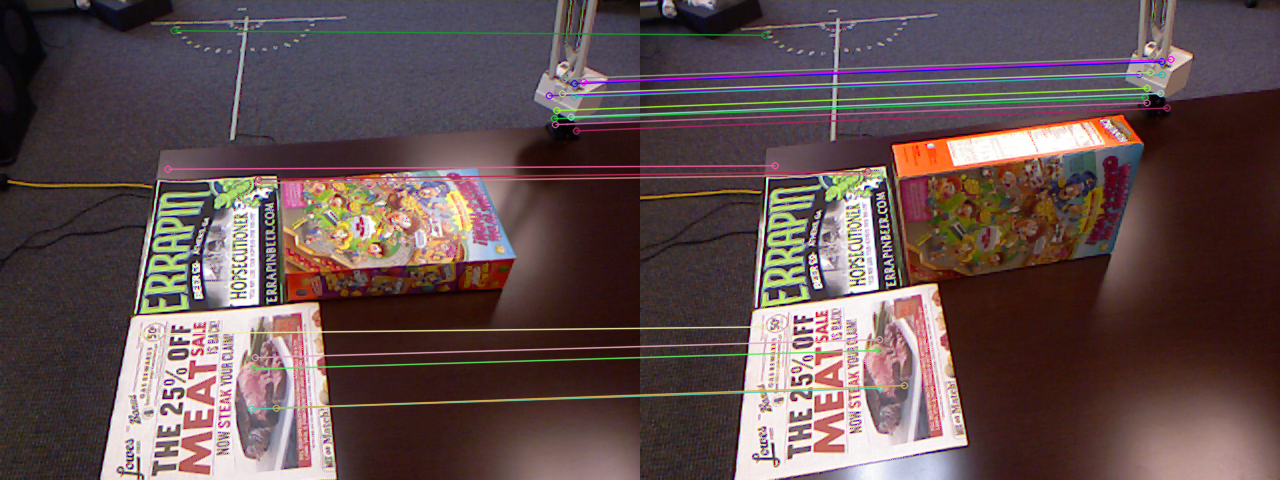

In [62]:
# Call ASIFT function with two images
asift(img1, img2)